# Data Wrangling Project
# Wrangling and Analysing WeRateDogs Twitter Tweet Archive

## Table of Contents

1. [Introduction](#intro)
2. [Gathering Data](#gather) <br>
    2.1 [Enhanced Twitter Archive](#twitarchive) <br>
    2.2 [Tweet Image Predictions](#predict) <br>
    2.3 [Tweet JSON Data](#json_data) <br>
3. [Assess Data](#assess) <br>
    3.1 [Enhanced Twitter Archive](#assess_archive)<br>
    3.2 [Tweet Image Predictions](#assess_predict)<br>
    3.3 [Tweet JSON Data](#assess_json)<br>
    3.4 [Quality Issues](#assess_quality) <br>
    3.5 [Tidiness Issues](#assess_tidiness) <br>
4. [Clean Data](#clean) <br>
5. [Analyse Data](#analyse) <br>
6. [Summary of Insights](#summary)
    

## Introduction <a id="intro"></a>

In this project, I will be gathering data from the WeRateDogs Twitter account. An archive of over 5,000 tweets up to August 1, 2017 has been downloaded to be analysed. A file containing the top 3 image predictions for the dog breeds of the pictures in these tweets using a neural network has been provided. Additional tweet information such as retweet and favourite counts will be collected for each tweet in the archive using the tweet's ID. This will be obtained by querying Twitter's API for each tweet's JSON data using the Tweepy library. This will then be stored into a .txt file and finally read into a pandas DataFrame. 

Once all of the relevant information has been gathered, the data will be assessed for quality and tidiness issues. 

The issues identified will then be cleaned to produce a master DataFrame that contains all of the important information required for the analysis portion of the project.

Finally, the data will be analysed to provide insights and to create visualisations based on the data collected.

In [1]:
# prerequisite package imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import tweepy
import json
import datetime as dt
import time

%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

## Gathering Data <a id="gather"></a>

### 1. Enhanced Twitter Archive<a id="twitarchive"></a>

Udacity has provided a .csv that contains basic tweet data for 5000+ of WeRateDogs' tweets. This file was downloaded manually and contains some basic information such as tweet_id, every tweet's text, dog's name and dog stage.

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


### 2. Tweet Image Predictions <a id="predict"></a>

Udacity has provided a file with tweet image predictions according to a neural network. The top 3 predictions have been recorded and whether the prediction is a dog breed and the confidence level are also listed.

In [5]:
# Programmatically downloading tweet image predictions. Response 200 indicates the request has succeeded.
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response

<Response [200]>

In [6]:
# Saving file
with open(os.path.join(url.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)

In [7]:
# Check if the file 'image-predictions.tsv' has been downloaded correctly
os.listdir()

['wrangle_act.ipynb',
 'twitter-archive-enhanced.csv',
 '.DS_Store',
 'act_report.pdf',
 'Updates in progress',
 'twitter_archive_master.csv',
 '.ipynb_checkpoints',
 'image-predictions.tsv',
 'tweet_json.txt',
 'wrangle_report.pdf']

In [5]:
# Load 'image-predictions.tsv'
predictions = pd.read_csv('image-predictions.tsv', sep='\t')
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 3. Tweet JSON Data <a id="json_data"></a>

In [10]:
consumer_key = 'SECRET KEY'
consumer_secret = 'SECRET KEY'
access_token = 'SECRET KEY'
access_secret = 'SECRET KEY'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [11]:
# Get list of tweets to query.
tweet_ids = archive.tweet_id.values
print('Number of tweets to query: ' + str(len(tweet_ids)) + '\n')

count = 0
json_tweets = []
error_tweets = []

# Start time
start = time.time()

# Begin querying twitter API
for tweet in tweet_ids:
    
    #tweet counter
    count = count + 1
    
    try:
        tweet = api.get_status(tweet, tweet_mode = 'extended')._json
        json_tweets.append(tweet)
    except:
        error_tweets.append(tweet)
        print('Tweet not found: '+str(tweet)) # outputs errored tweets when encountered 
       
    # Count every 100th tweet to keep track of progress and also Twitter has a limit of 100 tweets per request.    
    if count %100==0:
        print('Tweet #'+str(count))
        
# Total Run Time
run_time = time.time()-start
run_time = time.strftime("%H:%M:%S", time.gmtime(run_time))
print('Total run time: '+run_time)

# Total tweets found

print('\n'+str(len(json_tweets)) +' tweets successfully found.')

# Total tweets with errors

print('List of tweet_ids with errors '+str(len(error_tweets))+' tweets not found.'+'\n')
for error in error_tweets:
    print('Tweet_id not found: '+ str(error))

Number of tweets to query: 2356

Tweet not found: 888202515573088257
Tweet not found: 873697596434513921
Tweet #100
Tweet not found: 872668790621863937
Tweet not found: 872261713294495745
Tweet not found: 869988702071779329
Tweet not found: 866816280283807744
Tweet not found: 861769973181624320
Tweet not found: 856602993587888130
Tweet #200
Tweet not found: 851953902622658560
Tweet not found: 845459076796616705
Tweet not found: 844704788403113984
Tweet not found: 842892208864923648
Tweet not found: 837366284874571778
Tweet not found: 837012587749474308
Tweet #300
Tweet not found: 829374341691346946
Tweet not found: 827228250799742977
Tweet #400
Tweet #500
Tweet not found: 812747805718642688
Tweet not found: 802247111496568832
Tweet #600
Tweet #700
Tweet not found: 779123168116150273
Tweet not found: 775096608509886464
Tweet #800
Tweet not found: 771004394259247104
Tweet not found: 770743923962707968
Tweet not found: 759566828574212096


Rate limit reached. Sleeping for: 690


Tweet #900
Tweet not found: 754011816964026368
Tweet #1000
Tweet #1100
Tweet #1200
Tweet #1300
Tweet #1400
Tweet #1500
Tweet #1600
Tweet #1700
Tweet not found: 680055455951884288


Rate limit reached. Sleeping for: 693


Tweet #1800
Tweet #1900
Tweet #2000
Tweet #2100
Tweet #2200
Tweet #2300
Total run time: 00:32:20

2331 tweets successfully found.
List of tweet_ids with errors 25 tweets not found.

Tweet_id not found: 888202515573088257
Tweet_id not found: 873697596434513921
Tweet_id not found: 872668790621863937
Tweet_id not found: 872261713294495745
Tweet_id not found: 869988702071779329
Tweet_id not found: 866816280283807744
Tweet_id not found: 861769973181624320
Tweet_id not found: 856602993587888130
Tweet_id not found: 851953902622658560
Tweet_id not found: 845459076796616705
Tweet_id not found: 844704788403113984
Tweet_id not found: 842892208864923648
Tweet_id not found: 837366284874571778
Tweet_id not found: 837012587749474308
Tweet_id not found: 829374341691346946
Tweet_id not found: 827228250799742977
Tweet_id not found: 812747805718642688
Tweet_id not found: 802247111496568832
Tweet_id not found: 779123168116150273
Tweet_id not found: 775096608509886464
Tweet_id not found: 771004394259247104

In [12]:
# Creating file name
tweet_json_file = 'tweet_json.txt'

In [13]:
# Save json_file
with open(tweet_json_file, 'w',encoding="utf-8") as file:
    for tweet_json in json_tweets:
        json.dump(tweet_json, file)
        file.write('\n')

In [7]:
# Reading JSON file
tweet_json_info = []

# Store each tweet's details as a dictionary, every tweet should then form a list.
with open('tweet_json.txt', 'r',encoding = 'utf-8') as json_file:
    line = json_file.readline()
    for line in json_file:
        json_data = json.loads(line)
        
        # variables of interest as a dictionary
        json_data_add = {'tweet_id':json_data['id'],
                         'favourites':json_data['favorite_count'],
                         'retweets':json_data['retweet_count']}
                          
        # Append variables into the list.
        tweet_json_info.append(json_data_add)

In [8]:
# Create DataFrame
df_extra_info = pd.DataFrame(tweet_json_info,columns = ['tweet_id','favourites','retweets'])

In [9]:
df_extra_info

,tweet_id,favourites,retweets
0,892177421306343426,30305,5480
1,891815181378084864,22793,3624
2,891689557279858688,38264,7532
3,891327558926688256,36543,8115
4,891087950875897856,18431,2715
...,...,...,...
2325,666049248165822465,93,38
2326,666044226329800704,259,122
2327,666033412701032449,107,39
2328,666029285002620928,117,41


## Assess Data <a id="assess"></a>

In this section I will be assessing the data gathered for quality and tidiness issues. Assessment will be performed both visually and programmatically. 

### 1. Enhanced Twitter Archive <a id="assess_archive"></a>

In [10]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**Issues**

- There are 78 replies to another tweet, this is shown by 78 entries in the in_reply_to_status_id and in_reply_to_user_id columns.
- There are 181 retweets shown by entries in retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.
- The datatypes of the columns that refer to IDs are floating integers. (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id)
- The timestamp field has the datatype object.
- There are 59 entries with missing expanded_urls.
- There are 4 columns for the dog stages; doggo, floofer, pupper and puppo.

In [12]:
archive.tweet_id.duplicated().sum()

0

There are no duplicated entries for tweet_id.

In [13]:
# List all sources
archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

There are only four sources, this could be simplified and the datatype could also be changed.

In [14]:
archive.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

Some rating_denominators are not 10.

In [15]:
# Display the denominators that are not 10.
pd.array(archive[archive.rating_denominator != 10]['rating_denominator'])

<PandasArray>
[  0,  15,  70,   7,  11, 150,  11, 170,  20,  50,  90,  80,  50,  50,  40,
  20, 130, 110,  11,  16, 120,  80,   2]
Length: 23, dtype: int64

There are 23 entries with rating_denominator that are not 10.

In [16]:
archive.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

There are quite a few very large and low ratings, these will need to be looked at further to determine whether they should be kept.

In [17]:
archive.rating_denominator

0       10
1       10
2       10
3       10
4       10
        ..
2351    10
2352    10
2353    10
2354    10
2355    10
Name: rating_denominator, Length: 2356, dtype: int64

In [18]:
archive.name.sort_values()

1035     Abby
1021     Abby
938       Ace
1933     Acro
1327    Adele
        ...  
1031     very
773      very
1097     very
819      very
1385     very
Name: name, Length: 2356, dtype: object

In [19]:
archive.name.sample(10)

1337      Terrenth
355         Reggie
1948       Pickles
1219      Benedict
211         Astrid
2313         Lugan
2317       Jimothy
2023          Lola
1342    Chesterson
1522         Hazel
Name: name, dtype: object

By visual assessment, some entries are not about dogs. An example is shown below where the caption states we only rate dogs.

In [20]:
archive[archive.index==1090]['text']

1090    We only rate dogs. Pls stop sending in non-can...
Name: text, dtype: object

In [21]:
# 'only send in dogs' captions to filter some of the non-dog submissions.
not_dog1 = archive[archive['text'].str.contains("only send in dogs")]
not_dog1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
224,849336543269576704,NaN,NaN,2017-04-04 19:03:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",At first I thought this was a dog because of t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849336543...,11,10,None,None,None,None,None
246,845677943972139009,NaN,NaN,2017-03-25 16:45:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",C'mon guys. Please only send in dogs. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/845677943...,12,10,None,None,None,None,None
386,826615380357632002,NaN,NaN,2017-02-01 02:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Please only send in dogs. We on...,8.099208e+17,4.196984e+09,2016-12-17 00:38:52 +0000,https://twitter.com/dog_rates/status/809920764...,10,10,None,None,None,None,None
521,809920764300447744,NaN,NaN,2016-12-17 00:38:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Please only send in dogs. We only rate dogs, n...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/809920764...,10,10,None,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
890,759566828574212096,NaN,NaN,2016-07-31 01:50:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This... is a Tyrannosaurus rex....,7.395441e+17,4.196984e+09,2016-06-05 19:47:03 +0000,https://twitter.com/dog_rates/status/739544079...,10,10,None,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1077,739544079319588864,NaN,NaN,2016-06-05 19:47:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Tyrannosaurus rex. We only rate d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739544079...,10,10,None,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None


In [22]:
# Captions with 'only rate dogs' to filter some of the non dog submissions.
not_dog2 = archive[archive['text'].str.contains("only rate dogs")]
not_dog2

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
59,880872448815771648,NaN,NaN,2017-06-30 19:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ugh not again. We only rate dogs. Please don't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880872448...,12,10,None,None,None,None,None
93,874057562936811520,NaN,NaN,2017-06-12 00:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I can't believe this keeps happening. This, is...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/874057562...,12,10,None,None,None,None,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
127,867900495410671616,NaN,NaN,2017-05-26 00:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable. We only rate dogs. Please don't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867900495...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,679530280114372609,NaN,NaN,2015-12-23 05:13:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this really needs to stop. We've been ove...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679530280...,7,10,a,None,None,None,None
1745,679148763231985668,NaN,NaN,2015-12-22 03:57:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know everyone's excited for Christmas but th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679148763...,8,10,None,None,None,None,None
1854,675534494439489536,NaN,NaN,2015-12-12 04:35:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys?! Only send in dogs. I only rat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675534494...,11,10,a,None,None,None,None
1877,675109292475830276,NaN,NaN,2015-12-11 00:26:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",C'mon guys. We've been over this. We only rate...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675109292...,9,10,a,None,None,None,None


Above are two common comments used when a submission is not a dog.

Some entries do not have dog names and some of the dog names listed are not dog names.

In [23]:
archive.name.sort_values()

1035     Abby
1021     Abby
938       Ace
1933     Acro
1327    Adele
        ...  
1031     very
773      very
1097     very
819      very
1385     very
Name: name, Length: 2356, dtype: object

In [24]:
archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In the list above, by visual assessment, some of the listed names aren't dog names. The dog names start with a capital letter whilst the words that are not dog names start with a lowercase letter.

In [25]:
# Some tweets do not have expanded urls, displayed below
archive[archive.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


Above are the tweets without expanded urls. At first glance, a lot of these are replies or retweets.

In [26]:
# Identifying tweets with no expanded urls that are not retweets or replies.
no_url = archive[archive.expanded_urls.isnull() & archive.in_reply_to_status_id.isnull() & archive.retweeted_status_id.isnull()]
no_url[['tweet_id','text','expanded_urls','in_reply_to_status_id','retweeted_status_id']]

,tweet_id,text,expanded_urls,in_reply_to_status_id,retweeted_status_id
375,828361771580813312,Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN
707,785515384317313025,"Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN


There are 3 tweets without expanded urls and are not retweets or replies.

In [27]:
# See if tweets appear in the json data table
no_url_tweets = no_url['tweet_id'].values
df_extra_info[df_extra_info.tweet_id.isin(no_url_tweets)]

,tweet_id,favourites,retweets
359,828361771580813312,2132,172
688,785515384317313025,6018,1228
1420,696518437233913856,3771,1645


These 3 tweets are present in the json_data table.

In [28]:
# Do these have image predictions?
predictions.tweet_id.isin(no_url).sum()

0

The tweets do not appear in the predictions table however.

### 2. Tweet Image Predictions <a id="assess_predict"></a>

In [29]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [30]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**Notes**
- There are no missing information in this table.
- p1, p2, p3 columns have a mixture of capital and lowercase letters for names.
- There were 2356 tweets in the archive but only 2075 predictions suggesting some images do not have a prediction.


In [32]:
predictions.tweet_id.duplicated().sum()

0

There are no duplicated tweet_ids.

In [33]:
sample_tweet = archive.tweet_id == 833826103416520705

In [34]:
archive[sample_tweet][['tweet_id','expanded_urls']]

,tweet_id,expanded_urls
326,833826103416520705,https://twitter.com/dog_rates/status/833826103...


In [35]:
predictions[predictions.tweet_id == 833826103416520705][['tweet_id','jpg_url']]

,tweet_id,jpg_url
1815,833826103416520705,https://pbs.twimg.com/media/C5JYaYoVYAAcEQw.jpg


Despite the urls being different, these are the same image, one is the image displayed on twitter and the other is the image on its own. It is unnecessary to keep both urls as long as there is tweet_id to identify the tweet.

In [36]:
# Examining image numbers
predictions.img_num.sort_values()

0       1
1295    1
1294    1
1293    1
1292    1
       ..
1978    4
1496    4
1768    4
1713    4
2040    4
Name: img_num, Length: 2075, dtype: int64

Some tweets have multiple images.

In [37]:
# Show all the tweets with multiple images
predictions[predictions.img_num>1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
315,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False
319,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373,True,French_bulldog,0.112796,True,Italian_greyhound,0.062893,True
345,672272411274932228,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,2,pug,0.914685,True,Norwegian_elkhound,0.014982,True,Siamese_cat,0.009221,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True


Above are the list of 295 tweets where a prediction was made not based on the first image. Also, as we have already identified that there were no duplicate tweet_ids, if a tweet has multiple images, only one of the images has an image prediction store in this table. Also, not every prediction was a dog breed.

In [38]:
# List the predictions where all 3 predictions were not a dog breed.
predictions[(predictions.p1_dog==0) & (predictions.p2_dog==0) & (predictions.p3_dog==0)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


Above are the list of 324 tweets where none of the predictions were a dog breed.

### 3. Tweet JSON Data <a id="assess_json"></a>

In [39]:
df_extra_info.head()

,tweet_id,favourites,retweets
0,892177421306343426,30305,5480
1,891815181378084864,22793,3624
2,891689557279858688,38264,7532
3,891327558926688256,36543,8115
4,891087950875897856,18431,2715


In [40]:
df_extra_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   tweet_id    2330 non-null   int64
 1   favourites  2330 non-null   int64
 2   retweets    2330 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


There are no missing values in this dataframe, the datatypes for tweet_id, favourites and retweets are integers which is fine. 

In [41]:
df_extra_info.describe()

,tweet_id,favourites,retweets
count,2.330000e+03,2330.000000,2330.000000
mean,7.418433e+17,7295.987983,2584.181974
std,6.817501e+16,11338.890678,4374.627443
min,6.660209e+17,0.000000,1.000000
25%,6.782612e+17,1266.250000,524.250000
50%,7.182408e+17,3168.500000,1205.500000
75%,7.986600e+17,8930.750000,2990.000000
max,8.921774e+17,150412.000000,74219.000000


In [42]:
missing_tweets = archive.tweet_id.count()-df_extra_info.tweet_id.count()
print('There are '+ str(missing_tweets)+' tweets that have been deleted.')

There are 26 tweets that have been deleted.


### Quality issues <a id="assess_quality"></a>

`Enhanced Twitter Archive`
- There are 78 replies to another tweet, this is shown by 78 entries in the in_reply_to_status_id and in_reply_to_user_id columns.
- There are 181 retweets shown by entries in retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.
- The datatypes of the columns that refer to IDs are floating integers (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id). These columns will become redundant after cleaning however.
- The timestamp field has the datatype object and currently every value has +0000 which is unnecessary.
- There are 59 entries with missing expanded_urls.

- There are only 4 values for the source column and currently has the datatype object.
- Some dog's names are incorrectly recorded. Such as very, an or a, dog names are in capitals, lowercase words are not names. 
- Some submissions are not dogs.
- Not every entry has a dog name listed.
- Some tweets have no expanded urls. 3 of these tweets are not retweets or replies, they have no image prediction. 
- Ratings should always have a denominator of 10 unless there are multiple dogs.
- Some rating_numerators are abnormally high, these should be examined further to see if they skew the data.


`Tweet Image Predictions`
- p1, p2 and p3 columns have a mixture of upper and lowercase names.
- There were 2356 tweets in the archive but only 2075 predictions suggesting some images do not have a prediction.
 

`Tweet JSON Data`
- 26 tweets from the archive have been deleted and therefore the favourites and retweets count is missing for these.

### Tidiness issues <a id="assess_tidiness"></a>

`Enhanced Twitter Archive`
- Drop columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp. The rating_denominators column will also be redundant once all denominators are 10.
- There are 4 columns for the dog stages; doggo, floofer, pupper and puppo. There should just be one stating the dog stage.

`Tweet Image Predictions`
- Tweet info should be in the archive table. Image prediction table should only have tweet_id as the identifier. It is unnecessary to have two urls (expanded_url in archive table and jpg_url in predictions) for the same image.
- The best dog breed prediction should be stored in the archive table as that table stores information about the dog.

`Tweet JSON Data`

- The favourites and retweets columns should be listed in the archive table.

## Clean Data <a id="clean"></a>

In this section, I will be cleaning the issues documented above.

In [43]:
# Make a copy of all dataframes before cleaning
archive_clean = archive.copy()
predictions_clean = predictions.copy()
json_clean = df_extra_info.copy()

### Quality #1 - Enhanced Twitter Archive 
There are 78 replies but we are only interested in original tweets.

#### **Define**

Drop rows where the columns `in_reply_to_status_id` and `in_reply_to_user_id` are not null.

#### Code

In [44]:
# We only want to keep tweets that are not replies.
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isnull()]
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [45]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2278 non-null   object 
 4   source                      2278 non-null   object 
 5   text                        2278 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2274 non-null   object 
 10  rating_numerator            2278 non-null   int64  
 11  rating_denominator          2278 non-null   int64  
 12  name                        2278 non-null   object 
 13  doggo                       2278 

There are no rows with values in `in_reply_to_status_id` and `in_reply_to_user_id`. There were 2356 entries before so we expect to have 2278 rows after the 78 replies are dropped.

### Quality #2 - Enhanced Twitter Archive

There are 181 retweets. Only original tweets should be included in this dataset.

#### Define

Drop all rows that are not null for columns: `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`.

#### Code

In [46]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### Test

In [47]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

There are now no non-null values in columns `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`. Also as there were 2278 rows before and 181 retweets so we expect there to be 2097 entries after the retweet rows have been dropped.

### Quality #3 - Enhanced Twitter Archive

The `timestamp` field currently has the datatype object (string). This should be converted to a datetime format and remove the extra +0000 on every time.

#### Define
Convert the timestamp's datatype into datetime format.

#### Code

In [48]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [49]:
archive_clean.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2351    2015-11-16 00:24:50 +0000
2352    2015-11-16 00:04:52 +0000
2353    2015-11-15 23:21:54 +0000
2354    2015-11-15 23:05:30 +0000
2355    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2097, dtype: object

In [50]:
# Convert to datetime format
archive_clean['timestamp']=pd.to_datetime(archive_clean['timestamp'])

<ipython-input-50-295fa0564902>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean['timestamp']=pd.to_datetime(archive_clean['timestamp'])


In [51]:
archive_clean.timestamp

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2097, dtype: datetime64[ns, UTC]

In [52]:
# Remove unnecessary timezone information.
archive_clean['timestamp'] = archive_clean.timestamp.dt.to_period('s').dt.to_timestamp()

/Users/vincentkhor/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1088: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
<ipython-input-52-853ef164b528>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean['timestamp'] = archive_clean.timestamp.dt.to_period('s').dt.to_timestamp()


#### Test

In [53]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [54]:
archive_clean['timestamp']

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
               ...        
2351   2015-11-16 00:24:50
2352   2015-11-16 00:04:52
2353   2015-11-15 23:21:54
2354   2015-11-15 23:05:30
2355   2015-11-15 22:32:08
Name: timestamp, Length: 2097, dtype: datetime64[ns]

#### Test

In [55]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2097 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2097 non-null   datetime64[ns]
 4   source                      2097 non-null   object        
 5   text                        2097 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2094 non-null   object        
 10  rating_numerator            2097 non-null   int64         
 11  rating_denominator          2097 non-null   int64       

In [56]:
archive_clean[['timestamp']]

,timestamp
0,2017-08-01 16:23:56
1,2017-08-01 00:17:27
2,2017-07-31 00:18:03
3,2017-07-30 15:58:51
4,2017-07-29 16:00:24
...,...
2351,2015-11-16 00:24:50
2352,2015-11-16 00:04:52
2353,2015-11-15 23:21:54
2354,2015-11-15 23:05:30


The `timestamp`column now has a datetime datatype and the +0000 has been removed from all values.

### Quality #4 - Enhanced Twitter Archive
There are currently only four different values for the `source` column with long names, these could be simplified.

#### Define
Simplify each of the four values for `source` using regex.


#### Code

In [57]:
# View all source names
archive_clean.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [58]:
# Use regular expressions to extract between > and < where it states the source.
archive_clean.source = archive_clean.source.str.extract('^<.+>(.+)<.+a>$')

/Users/vincentkhor/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### Test

In [59]:
archive_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Quality #5 - Enhanced Twitter Archive
There are only 4 different values for `source`. The datatype could be converted to a more suitable type.

#### Define

Convert the `source` datatype to categorical.

#### Code

In [60]:
# Change the datatype to category.
archive_clean['source'] = archive_clean.source.astype('category')

<ipython-input-60-c8c096cce33b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean['source'] = archive_clean.source.astype('category')


#### Test

In [61]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2097 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2097 non-null   datetime64[ns]
 4   source                      2097 non-null   category      
 5   text                        2097 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2094 non-null   object        
 10  rating_numerator            2097 non-null   int64         
 11  rating_denominator          2097 non-null   int64       

### Quality #6 - Enhanced Twitter Archive

Not all of the names in the `name` column are dog names. Many words are also listed and start with a lowercase.

#### Define
Replace all of the lowercase words in the `name` column with NaN as they are not dog names. Also replace None values to NaNs.

#### Code

In [62]:
# Checking how many words have been listed as dog names.
archive_clean.name.str.contains('^[a-z]',regex=True).sum()

104

In [63]:
#Converting words that have been listed as dog names to NaN.
error_mask = archive_clean.name.str.contains('^[a-z]',regex=True)
error_names_list = archive_clean[error_mask].name
error_names_list

for name in error_names_list:
       archive_clean.name.replace(name,np.nan, inplace=True)


/Users/vincentkhor/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [64]:
# Convert the rest of the tweets with None for dog name to NaN
archive_clean.name.replace('None',np.nan,inplace=True)

### Test

In [65]:
# Rerun to check if any lowercase words remain (non dog names)
archive_clean.name.str.contains('^[a-z]',regex=True).sum()

0

In [66]:
archive_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351         NaN
2352         NaN
2353         NaN
2354         NaN
2355         NaN
Name: name, Length: 2097, dtype: object

### Quality #7 - Enhanced Twitter Archive

Some of the submissions are not dogs. Common words used in captions of images that are not dogs include: 'only rate dogs'.

#### Define

Drop rows containing submissions that contain images that are not of dogs. Common captions in `text` include 'only rate dogs'.

#### Code

In [67]:
# Check how many rows contain a tweet not of a dog.
archive_clean.text.str.contains('only rate dogs', regex=True).sum()

54

In [68]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2097 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2097 non-null   datetime64[ns]
 4   source                      2097 non-null   category      
 5   text                        2097 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2094 non-null   object        
 10  rating_numerator            2097 non-null   int64         
 11  rating_denominator          2097 non-null   int64       

We currently have 2097 entries, expect 2043 once tweets not about a dog have been removed.

In [69]:
archive_clean = archive_clean[~archive_clean.text.str.contains('only rate dogs', regex=True)]

#### Test

In [70]:
# Check number of rows contain 'only rate dogs'
archive_clean.text.str.contains('only rate dogs', regex=True).sum()

0

In [71]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2043 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2043 non-null   datetime64[ns]
 4   source                      2043 non-null   category      
 5   text                        2043 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2040 non-null   object        
 10  rating_numerator            2043 non-null   int64         
 11  rating_denominator          2043 non-null   int64       

There are now only 2043 rows as expected.

### Quality #8 - Enhanced Twitter Archive

Dog ratings should be re-extracted from the text.

#### Define
Re-extract the dog ratings from the text using regex and then determine whether the rating_denominators that are not 10 can be amended by a manual fix due to wrong values being extracted.

#### Code

In [72]:
# re-extract the numerators and denominators using regex
rating = archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


In [73]:
# Add column titles
rating.columns = ['rating_numerator', 'rating_denominator']

In [74]:
# convert 'rating_numerator' and 'rating_denominator' to floats
archive_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
archive_clean['rating_denominator'] = rating['rating_denominator'].astype(float)

<ipython-input-74-18377ac1884a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
<ipython-input-74-18377ac1884a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean['rating_denominator'] = rating['rating_denominator'].astype(float)


In [75]:
# display all text in the dataframe.
pd.set_option('display.max_colwidth', 1) 
# display tweets with a rating denominator that is not 10.
archive_clean[archive_clean.rating_denominator != 10.0][['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0


**Notes:** 

Most of the tweets are fine as they are a multiple of 10 as multiple dogs are present. Below are the tweet_ids that require amending with the correct ratings listed:
- 810984652412424192   NaN/NaN
- 740373189193256964   14/10
- 722974582966214656   13/10 
- 716439118184652801   11/10
- 682962037429899265   10/10
- 666287406224695296   09/10

In [76]:
# Tweet_id 810984652412424192 change values to NaN/NaN
archive_clean.loc[516,'rating_numerator']=np.nan
archive_clean.loc[516,'rating_denominator']=np.nan

/Users/vincentkhor/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [77]:
# Tweet_id 740373189193256964 change values to 14/10
archive_clean.loc[1068,'rating_numerator']=14
archive_clean.loc[1068,'rating_denominator']=10

In [78]:
# Tweet_id 722974582966214656 change values to 13/10
archive_clean.loc[1165,'rating_numerator']=13
archive_clean.loc[1165,'rating_denominator']=10

In [79]:
#Tweet_id 716439118184652801 change values to 11/10
archive_clean.loc[1202,'rating_numerator']=11
archive_clean.loc[1202,'rating_denominator']=10

In [80]:
#Tweet_id 682962037429899265 change values to 10/10
archive_clean.loc[1662,'rating_numerator']=11
archive_clean.loc[1662,'rating_denominator']=10

In [81]:
#Tweet_id 666287406224695296 change values to 9/10
archive_clean.loc[2335,'rating_numerator']=9
archive_clean.loc[2335,'rating_denominator']=10

#### Test

In [82]:
# Rerun to examine if the numerator and denominators have updated.
to_change = ['740373189193256964', '722974582966214656', '716439118184652801', '682962037429899265', '666287406224695296']
manual_mask = archive_clean[archive_clean['tweet_id'].isin(to_change)]
manual_mask[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14.0,10.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13.0,10.0
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11.0,10.0
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,11.0,10.0
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9.0,10.0


### Quality #9 - Enhanced Twitter Archive

Some tweets still have a `rating_denominator` that is not 10.

#### Define

Standardise all the ratings so that they are a rating out of 10.

In [83]:
# Normalise the numerator so it is based on a out of 10 rating.
archive_clean['rating_numerator'] = archive_clean.rating_numerator/archive_clean.rating_denominator*10
archive_clean

<ipython-input-83-a13dffe9c31c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean['rating_numerator'] = archive_clean.rating_numerator/archive_clean.rating_denominator*10


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,NaN,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,NaN,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,NaN,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,NaN,None,None,None,None


#### Test

In [84]:
archive_clean.rating_numerator.value_counts()

12.00      477
10.00      425
11.00      407
13.00      285
9.00       146
8.00       96 
7.00       50 
14.00      38 
5.00       33 
6.00       32 
3.00       18 
4.00       15 
2.00       9  
1.00       4  
1776.00    1  
9.75       1  
0.00       1  
13.50      1  
11.26      1  
11.27      1  
420.00     1  
Name: rating_numerator, dtype: int64

Some of the ratings have decimals so the datatype will be kept as a float. 

### Tidiness #1 Enhanced Twitter Archive
All ratings have a denominator of 10 so the column name can be simplified.

#### Define
Rename `rating_numerator` to `rating`.

#### Code

In [85]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2043 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2043 non-null   datetime64[ns]
 4   source                      2043 non-null   category      
 5   text                        2043 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2040 non-null   object        
 10  rating_numerator            2042 non-null   float64       
 11  rating_denominator          2042 non-null   float64     

In [86]:
archive_clean.rename(columns={"rating_numerator": "rating"}, inplace=True)

/Users/vincentkhor/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


#### Test

In [87]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2043 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2043 non-null   datetime64[ns]
 4   source                      2043 non-null   category      
 5   text                        2043 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2040 non-null   object        
 10  rating                      2042 non-null   float64       
 11  rating_denominator          2042 non-null   float64     

### Tidiness #2 Enhanced Twitter Archive
Drop redundant columns.

#### Define
Drop columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`,`rating_denominator`.

#### Code

In [88]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2043 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2043 non-null   datetime64[ns]
 4   source                      2043 non-null   category      
 5   text                        2043 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2040 non-null   object        
 10  rating                      2042 non-null   float64       
 11  rating_denominator          2042 non-null   float64     

In [89]:
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp','rating_denominator'],axis=1,inplace=True)

/Users/vincentkhor/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Test

In [90]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       2043 non-null   int64         
 1   timestamp      2043 non-null   datetime64[ns]
 2   source         2043 non-null   category      
 3   text           2043 non-null   object        
 4   expanded_urls  2040 non-null   object        
 5   rating         2042 non-null   float64       
 6   name           1389 non-null   object        
 7   doggo          2043 non-null   object        
 8   floofer        2043 non-null   object        
 9   pupper         2043 non-null   object        
 10  puppo          2043 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 257.8+ KB


The 6 redundant columns have successfully been dropped.

### Quality 10 - Enhanced Twitter Archive

Some `rating` are abnormally high or low, these should be examined more closely.

#### Define
Drop abnormally high or low results or amend as appropriate.

#### Code


In [91]:
archive_clean.rating.sort_values(ascending=False).head()

979     1776.0
2074    420.0 
436     14.0  
449     14.0  
22      14.0  
Name: rating, dtype: float64

The top 2 will be examined more closely.

In [92]:
top_2 = archive_clean.rating>15
archive_clean[top_2][['tweet_id','text','rating']]

,tweet_id,text,rating
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0
2074,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420.0


From the text, it is clear that these are outliers and will be dropped.

In [93]:
# Drop the following rows
# Only keep rows where the rating_numerator is still <15 after the amendment.
archive_clean = archive_clean[archive_clean.rating<15]

In [94]:
bottom_values = archive_clean.rating<=2
archive_clean[bottom_values][['tweet_id','text','rating']]

,tweet_id,text,rating
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0.0
1761,678675843183484930,Exotic pup here. Tail long af. Throat looks swollen. Might breathe fire. Exceptionally unfluffy 2/10 would still pet https://t.co/a8SqCaSo2r,2.0
1764,678424312106393600,This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz,2.0
1869,675153376133427200,What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,1.0
1920,674265582246694913,This is Henry. He's a shit dog. Short pointy ears. Leaves trail of pee. Not fluffy. Doesn't come when called. 2/10 https://t.co/Pu9RhfHDEQ,2.0
2079,670826280409919488,"Scary dog here. Too many legs. Extra tail. Not soft, let alone fluffy. Won't bark. Moves sideways. Has weapon. 2/10 https://t.co/XOPXCSXiUT",2.0
2091,670783437142401025,Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO,1.0
2237,668142349051129856,This lil pup is Oliver. Hops around. Has wings but doesn't fly (lame). Annoying chirp. Won't catch tennis balls 2/10 https://t.co/DnhUw0aBM2,2.0
2246,667878741721415682,This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN,2.0
2261,667549055577362432,Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,1.0


In [95]:
# tweet_id: 667878741721415682 should be have a rating_numerator of 10 not 2.
archive_clean.loc[2246,'rating_numerator']=10

/Users/vincentkhor/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/vincentkhor/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [96]:
# all other tweets in this list are not of dogs so can be removed.
archive_clean=archive_clean[archive_clean.rating>2]

#### Test

In [97]:
archive_clean.rating.sort_values()

1478    3.0 
765     3.0 
2136    3.0 
2239    3.0 
1601    3.0 
       ...  
83      14.0
56      14.0
924     14.0
490     14.0
404     14.0
Name: rating, Length: 2026, dtype: float64

This shows that the outliers have been removed or amended and also any tweets not about dogs that were found were dropped. There are likely many more non dog tweets but these will not be cleaned any further.

### Quality 11 - Tweet Image Predictions 
`p1`, `p2` and `p3` columns have a mixture of names beginning with uppercase and lowercase.

#### Define
Convert `p1`, `p2` and `p3` columns to lowercase names only.

#### Code

In [98]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [99]:
predictions_clean['p1'] = predictions_clean['p1'].str.lower() 
predictions_clean['p2'] = predictions_clean['p2'].str.lower() 
predictions_clean['p3'] = predictions_clean['p3'].str.lower() 

#### Test

In [100]:
predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [101]:
predictions_clean[['p1','p2','p3']].sample(10)

,p1,p2,p3
50,triceratops,armadillo,common_iguana
1569,cocker_spaniel,golden_retriever,jigsaw_puzzle
1876,samoyed,chow,white_wolf
992,staffordshire_bullterrier,american_staffordshire_terrier,kelpie
1430,blenheim_spaniel,shih-tzu,welsh_springer_spaniel
706,llama,triceratops,hog
409,suit,bow_tie,windsor_tie
330,pug,french_bulldog,bull_mastiff
1681,french_bulldog,boston_bull,boxer
1897,yorkshire_terrier,maltese_dog,shih-tzu


### Tidiness #3 Enhanced Twitter Archive

There are currently 4 columns to describe the dog stages. These are values not variable names.

#### Define

Create a new column called `dog_stage` that will state the dog stage if given. Drop the columns `doggo`, `floofer`, `pupper`, `puppo` once the column has been created.

#### Code

In [102]:
archive_clean[['tweet_id','doggo','floofer','pupper','puppo']].sample(10)

,tweet_id,doggo,floofer,pupper,puppo
1921,674262580978937856,None,None,pupper,None
563,802572683846291456,None,None,None,None
874,761292947749015552,None,None,None,None
2323,666428276349472768,None,None,None,None
2050,671497587707535361,None,None,None,None
1881,675003128568291329,None,None,None,None
2063,671159727754231808,None,None,None,None
735,781163403222056960,None,None,None,None
831,768609597686943744,None,None,None,None
392,826115272272650244,None,None,None,None


In [103]:
# Examine what names were used to record each dog stage in the columns of interest.
print(archive_clean.doggo.unique())
print(archive_clean.floofer.unique())
print(archive_clean.pupper.unique())
print(archive_clean.puppo.unique())

['None' 'doggo']
['None' 'floofer']
['None' 'pupper']
['None' 'puppo']


In [104]:
# Convert each columns values to None = ''.
archive_clean.doggo = archive_clean.doggo.replace('None','')
archive_clean.floofer = archive_clean.floofer.replace('None','')
archive_clean.pupper = archive_clean.pupper.replace('None','')
archive_clean.puppo = archive_clean.puppo.replace('None','')


In [105]:
archive_clean[['doggo','floofer','pupper','puppo']]

,doggo,floofer,pupper,puppo
0,,,,
1,,,,
2,,,,
3,,,,
4,,,,
...,...,...,...,...
2351,,,,
2352,,,,
2353,,,,
2354,,,,


In [106]:
# Check this change has worked before combining.
print(archive_clean.doggo.unique())
print(archive_clean.floofer.unique())
print(archive_clean.pupper.unique())
print(archive_clean.puppo.unique())

['' 'doggo']
['' 'floofer']
['' 'pupper']
['' 'puppo']


In [107]:
# combine column values into the new column 'dog_stage'
archive_clean['dog_stage'] = (archive_clean['doggo']+archive_clean['floofer']+archive_clean['pupper']+archive_clean['puppo'])

In [108]:
# List the new values for dog stages.
archive_clean['dog_stage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

Surprisingly, some tweets have multiple dog stages listed. These will be preserved but the names will be separated for readability.

In [109]:
archive_clean['dog_stage'].value_counts()

                1690
pupper          221 
doggo           72  
puppo           23  
floofer         9   
doggopupper     9   
doggopuppo      1   
doggofloofer    1   
Name: dog_stage, dtype: int64

In [110]:
archive_clean.dog_stage.replace('', np.nan,inplace=True) #change to NaN if none are stated
archive_clean.dog_stage.replace('doggopupper','doggo, pupper',inplace=True)
archive_clean.dog_stage.replace('doggopuppo','doggo, puppo',inplace=True)
archive_clean.dog_stage.replace('doggofloofer','doggo, floofer',inplace=True)

In [111]:
archive_clean['dog_stage'].value_counts()

pupper            221
doggo             72 
puppo             23 
floofer           9  
doggo, pupper     9  
doggo, puppo      1  
doggo, floofer    1  
Name: dog_stage, dtype: int64

In [112]:
# Tweets with no dog stage info recorded
archive_clean.shape[0]-archive_clean['dog_stage'].value_counts().sum()

1690

In [113]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          2026 non-null   int64         
 1   timestamp         2026 non-null   datetime64[ns]
 2   source            2026 non-null   category      
 3   text              2026 non-null   object        
 4   expanded_urls     2023 non-null   object        
 5   rating            2026 non-null   float64       
 6   name              1384 non-null   object        
 7   doggo             2026 non-null   object        
 8   floofer           2026 non-null   object        
 9   pupper            2026 non-null   object        
 10  puppo             2026 non-null   object        
 11  rating_numerator  0 non-null      float64       
 12  dog_stage         336 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(8)
memory usag

In [114]:
archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

Since there are now only a finite number of possible values for dog stage, this column's datatype will be converted to category.

In [115]:
archive_clean['dog_stage'] = archive_clean.dog_stage.astype('category')

#### Test

In [116]:
# Confirm that the datatype of dog_stage is category.
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          2026 non-null   int64         
 1   timestamp         2026 non-null   datetime64[ns]
 2   source            2026 non-null   category      
 3   text              2026 non-null   object        
 4   expanded_urls     2023 non-null   object        
 5   rating            2026 non-null   float64       
 6   name              1384 non-null   object        
 7   rating_numerator  0 non-null      float64       
 8   dog_stage         336 non-null    category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 131.1+ KB


In [117]:
# Confirm that the number of each dog stage has not changed.
archive_clean['dog_stage'].value_counts()

pupper            221
doggo             72 
puppo             23 
floofer           9  
doggo, pupper     9  
doggo, puppo      1  
doggo, floofer    1  
Name: dog_stage, dtype: int64

In [118]:
# Sample of 10 rows to examine the change.
archive_clean.sample(10)[['dog_stage']]

,dog_stage
2035,NaN
1424,NaN
1696,NaN
1083,puppo
681,NaN
2234,NaN
1855,NaN
2347,NaN
2193,NaN
560,NaN


### Tidiness #4 Twitter Image Predictions

The best dog breed prediction and confidence level should be calculated from the predictions table then merged with the archive table.

#### Define
Create a new column `breed` in predictions that will state the best dog prediction for breed. `Confidence` will be a column that states the confidence level of the prediction. If none of the predictions are of dogs, then NaN will be stated as the breed with a confidence level of 0. np.select will be used to select the correct columns to take the value from based on whether the prediction is of a dog. The `breed` and `confidence` columns will then be merged onto the archive DataFrame.

#### Code

In [119]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [120]:
# Create conditions to select from.
conditions = (predictions_clean.p1_dog==True,
              predictions_clean.p2_dog==True,
              predictions_clean.p3_dog==True)

# Create breed choice order based on conditions above.
choice_breed = (predictions_clean.p1,
               predictions_clean.p2,
               predictions_clean.p3)

# Create confidence choice order based on conditions above.
choice_confidence = (predictions_clean.p1_conf,
                    predictions_clean.p2_conf,
                    predictions_clean.p3_conf)

# Creation of the two new columns for best dog breed prediction and confidence level.
predictions_clean['breed'] = np.select(conditions, choice_breed, default=np.nan)
predictions_clean['confidence'] = np.select(conditions, choice_confidence, default=0)

In [121]:
predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,miniature_pinscher,0.560311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,basset,0.555712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,labrador_retriever,0.168086
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,chihuahua,0.716012
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,chihuahua,0.323581


In [122]:
# Merge new columns 'breed' and 'confidence' from predictions_clean to archive_clean by matching tweet_id columns.
archive_clean = pd.merge(archive_clean,predictions_clean[['tweet_id','breed','confidence']],on='tweet_id',how='left')

#### Test

In [123]:
# Check to see if the columns have successfully been added onto archive_clean.
archive_clean[['tweet_id','breed','confidence']].sample(20)

,tweet_id,breed,confidence
991,710997087345876993,malamute,0.281260
1386,682389078323662849,curly-coated_retriever,0.482288
1654,673343217010679808,chihuahua,0.541408
1609,674271431610523648,german_shepherd,0.991454
747,749317047558017024,wire-haired_fox_terrier,0.155144
1582,674788554665512960,miniature_poodle,0.349561
1025,708469915515297792,chihuahua,0.748163
199,842535590457499648,pembroke,0.685084
1145,698907974262222848,german_short-haired_pointer,0.983131
782,746369468511756288,german_shepherd,0.622957


This shows that the `breed` and `confidence` columns have been successfully added onto the archive_clean DataFrame. It also shows how `tweet_id` where no dog predictions were made are stored as none for `breed` and 0 for `confidence`. Tweets with no predictions have the `breed` and `confidence` values as NaN.

### Tidiness #5 Enhanced Twitter Archive

The `favourites` and `retweets` columns from the JSON table belong in the archive table.

#### Define

Merge the `favourites` and `retweets` columns in the JSON table with the archive table using `tweet_id` to perform the merge.

#### Code - Part 1

In [124]:
# Merge new columns 'breed' and 'confidence' from predictions_clean to archive_clean by matching tweet_id columns.
archive_clean = pd.merge(archive_clean,json_clean[['tweet_id','favourites','retweets']],on='tweet_id',how='left')

#### Test - Part 1

In [125]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating,name,rating_numerator,dog_stage,breed,confidence,favourites,retweets
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,Phineas,NaN,NaN,NaN,0.000000,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,Tilly,NaN,NaN,chihuahua,0.323581,30305.0,5480.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,Archie,NaN,NaN,chihuahua,0.716012,22793.0,3624.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,Darla,NaN,NaN,labrador_retriever,0.168086,38264.0,7532.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,Franklin,NaN,NaN,basset,0.555712,36543.0,8115.0


In [126]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2025
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          2026 non-null   int64         
 1   timestamp         2026 non-null   datetime64[ns]
 2   source            2026 non-null   category      
 3   text              2026 non-null   object        
 4   expanded_urls     2023 non-null   object        
 5   rating            2026 non-null   float64       
 6   name              1384 non-null   object        
 7   rating_numerator  0 non-null      float64       
 8   dog_stage         336 non-null    category      
 9   breed             1613 non-null   object        
 10  confidence        1900 non-null   float64       
 11  favourites        2019 non-null   float64       
 12  retweets          2019 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(5), int64(1), object(4)
memory usag

#### Code - Part 2

In [127]:
# Convert datatypes to integer
archive_clean['favourites'] = archive_clean.favourites.astype('Int64')
archive_clean['retweets'] = archive_clean.retweets.astype('Int64')

#### Test - Part 2

In [128]:
# Check datatypes of favourites and retweets are integers
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2025
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          2026 non-null   int64         
 1   timestamp         2026 non-null   datetime64[ns]
 2   source            2026 non-null   category      
 3   text              2026 non-null   object        
 4   expanded_urls     2023 non-null   object        
 5   rating            2026 non-null   float64       
 6   name              1384 non-null   object        
 7   rating_numerator  0 non-null      float64       
 8   dog_stage         336 non-null    category      
 9   breed             1613 non-null   object        
 10  confidence        1900 non-null   float64       
 11  favourites        2019 non-null   Int64         
 12  retweets          2019 non-null   Int64         
dtypes: Int64(2), category(2), datetime64[ns](1), float64(3), int64(1), object(4)
m

In [129]:
archive_clean.head()[['tweet_id','favourites','retweets']]

,tweet_id,favourites,retweets
0,892420643555336193,<NA>,<NA>
1,892177421306343426,30305,5480
2,891815181378084864,22793,3624
3,891689557279858688,38264,7532
4,891327558926688256,36543,8115


### Tidiness #6 Twitter Image Predictions 

As the `jpg_url` in predictions are the same images as the ones in `expanded_url` in archive_clean, this has been checked manually. These are no longer required, only one column in common is required between predictions and archive_clean. `tweet_id` will be used as the unique identifier to link the two DataFrames. 

Redundant columns in predictions will be dropped.

#### Define
Drop columns `breed`, `confidence` and `jpg_url`.

#### Code

In [130]:
# Drop redundant columns
predictions_clean.drop(['breed','confidence','jpg_url'],axis=1, inplace=True)

#### Test

In [131]:
predictions_clean.head()

,tweet_id,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [132]:
# Check datatypes after the merge.
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2025
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          2026 non-null   int64         
 1   timestamp         2026 non-null   datetime64[ns]
 2   source            2026 non-null   category      
 3   text              2026 non-null   object        
 4   expanded_urls     2023 non-null   object        
 5   rating            2026 non-null   float64       
 6   name              1384 non-null   object        
 7   rating_numerator  0 non-null      float64       
 8   dog_stage         336 non-null    category      
 9   breed             1613 non-null   object        
 10  confidence        1900 non-null   float64       
 11  favourites        2019 non-null   Int64         
 12  retweets          2019 non-null   Int64         
dtypes: Int64(2), category(2), datetime64[ns](1), float64(3), int64(1), object(4)
m

### Quality 12 - Enhanced Twitter Archive
As there are only a finite number of values for breed, the datatype can be changed.

#### Define
Convert `breed` column from object to category.

#### Code

In [133]:
archive_clean['breed']=archive_clean.breed.astype('category')

#### Test

In [134]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2025
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          2026 non-null   int64         
 1   timestamp         2026 non-null   datetime64[ns]
 2   source            2026 non-null   category      
 3   text              2026 non-null   object        
 4   expanded_urls     2023 non-null   object        
 5   rating            2026 non-null   float64       
 6   name              1384 non-null   object        
 7   rating_numerator  0 non-null      float64       
 8   dog_stage         336 non-null    category      
 9   breed             1613 non-null   category      
 10  confidence        1900 non-null   float64       
 11  favourites        2019 non-null   Int64         
 12  retweets          2019 non-null   Int64         
dtypes: Int64(2), category(3), datetime64[ns](1), float64(3), int64(1), object(3)
m

### Tidiness #7 Enhanced Twitter Archive

Due to the large amount of information in the `text` and `expanded_urls` columns, it is difficult to read the key values of interest. Therefore, the columns will be reordered and the `expanded_urls` will be dropped as it is no longer required, the url is also stored in the text column.

#### Define

Reorder the columns and drop `expanded_urls`.

#### Code

In [135]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2025
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          2026 non-null   int64         
 1   timestamp         2026 non-null   datetime64[ns]
 2   source            2026 non-null   category      
 3   text              2026 non-null   object        
 4   expanded_urls     2023 non-null   object        
 5   rating            2026 non-null   float64       
 6   name              1384 non-null   object        
 7   rating_numerator  0 non-null      float64       
 8   dog_stage         336 non-null    category      
 9   breed             1613 non-null   category      
 10  confidence        1900 non-null   float64       
 11  favourites        2019 non-null   Int64         
 12  retweets          2019 non-null   Int64         
dtypes: Int64(2), category(3), datetime64[ns](1), float64(3), int64(1), object(3)
m

In [136]:
# New columns order
order_list = ['tweet_id','timestamp','rating','favourites','retweets','breed','confidence','name','dog_stage','source','text']
archive_clean = archive_clean[order_list]

#### Test

In [137]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2025
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tweet_id    2026 non-null   int64         
 1   timestamp   2026 non-null   datetime64[ns]
 2   rating      2026 non-null   float64       
 3   favourites  2019 non-null   Int64         
 4   retweets    2019 non-null   Int64         
 5   breed       1613 non-null   category      
 6   confidence  1900 non-null   float64       
 7   name        1384 non-null   object        
 8   dog_stage   336 non-null    category      
 9   source      2026 non-null   category      
 10  text        2026 non-null   object        
dtypes: Int64(2), category(3), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 158.8+ KB


In [138]:
archive_clean.head()

,tweet_id,timestamp,rating,favourites,retweets,breed,confidence,name,dog_stage,source,text
0,892420643555336193,2017-08-01 16:23:56,13.0,<NA>,<NA>,NaN,0.000000,Phineas,NaN,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27,13.0,30305,5480,chihuahua,0.323581,Tilly,NaN,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
2,891815181378084864,2017-07-31 00:18:03,12.0,22793,3624,chihuahua,0.716012,Archie,NaN,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51,13.0,38264,7532,labrador_retriever,0.168086,Darla,NaN,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,12.0,36543,8115,basset,0.555712,Franklin,NaN,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f"


### Storing Data

This is the only file that needs to be stored as it contains all of the data required for analysis and the data has been cleaned.

In [139]:
archive_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyse Data <a id="analyse"></a>

The data to be analysed in this section is data that has been assessed and cleaned in the previous section. Only original tweets are included in this analysis and additional information such as the number of retweets, the number of favourites and image prediction data has been combined with the original Twitter archive. Erroneous and irrelevant data for this study have been removed so that meaningful insights and visualisations can be created.

In [140]:
twitter_data = archive_clean.copy()

In [141]:
# Display basic statistics
twitter_data[['rating','favourites','retweets','confidence']].describe()

,rating,favourites,retweets,confidence
count,2026.000000,2019.000000,2019.000000,1900.000000
mean,10.679556,7890.424963,2362.648836,0.467410
std,2.025384,11571.519276,4195.045256,0.339032
min,3.000000,69.000000,11.000000,0.000000
25%,10.000000,1744.500000,528.000000,0.146203
50%,11.000000,3569.000000,1151.000000,0.460157
75%,12.000000,9882.000000,2705.500000,0.778514
max,14.000000,150412.000000,74219.000000,0.999956


#### What is the most common rating?

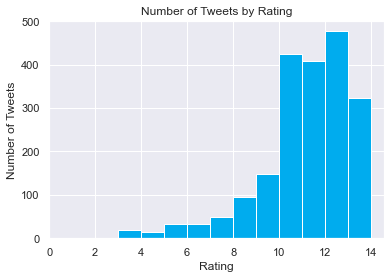

In [142]:
# Plot bars
plt.hist(twitter_data.rating,bins=11,color='#00acee')

# labels
plt.xlabel('Rating')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Rating')
plt.xlim(0);

Most ratings are above 10. The most common rating was 13/10. As most tweets had a rating of 10/10 or above, I will examine the proportion of tweets with ratings of 10/10 or greater.

In [143]:
high_rating = sum(twitter_data.rating>=10)
total = twitter_data.shape[0]
prop_high = (high_rating/total*100)

print(str(high_rating)+' out of '+str(total)+' tweets have a rating of at least 10.')
print(str(round(prop_high,1))+'% of tweets have a rating of at least 10.')

1635 out of 2026 tweets have a rating of at least 10.
80.7% of tweets have a rating of at least 10.


#### What is the most common tweet source?


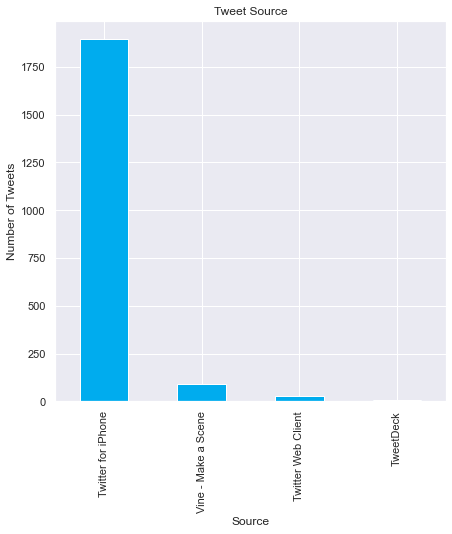

In [144]:
# Sort source by descending order and plot graph
source_values = twitter_data['source'].value_counts(ascending=False)
source_values.plot(kind='bar',color='#00acee',figsize=(7,7))

# Label graph
plt.title('Tweet Source')
plt.ylabel('Number of Tweets')
plt.xlabel('Source');

The most common tweet source is iPhone then Vine then Twitter Web Client then TweetDeck.

In [145]:
# Proportion of tweets made from an iPhone
iPhone_prop = sum(twitter_data.source=='Twitter for iPhone')/twitter_data.shape[0]*100
print(str(round(iPhone_prop,1))+'% of tweets were made from an iPhone.')

93.6% of tweets were made from an iPhone.


#### What is the most common dog stage?

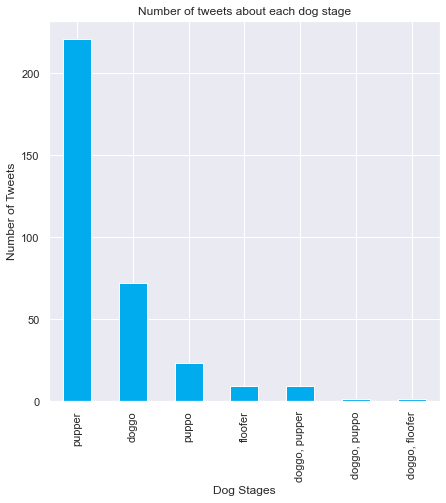

In [146]:
stage_values = twitter_data.dog_stage.value_counts(ascending=False)

# Plot dog_stage values excluding not stated.
stage_values.plot(kind='bar',color='#00acee',figsize=(7,7))

# Label graph
plt.title('Number of tweets about each dog stage')
plt.ylabel('Number of Tweets')
plt.xlabel('Dog Stages');

The most common dog stage was pupper. There were a few entries that included multiple dog stages, each of which included the dog stage doggo.

#### What are the top 10 most commonly tweeted dog breeds?

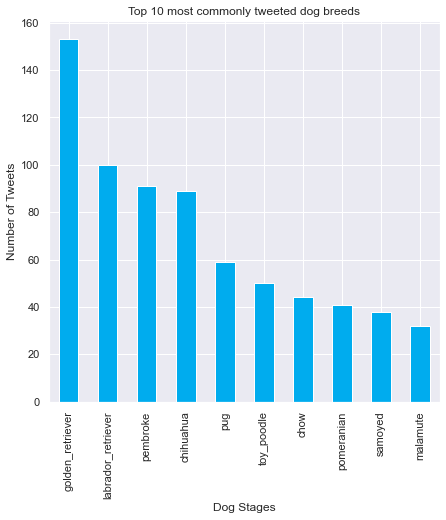

In [147]:
# Plot the top 10 dog breeds.
breed_values = twitter_data.breed.value_counts(ascending=False)
breed_values[:10].plot(kind='bar',color='#00acee',figsize=(7,7))

# Label graph
plt.title('Top 10 most commonly tweeted dog breeds')
plt.ylabel('Number of Tweets')
plt.xlabel('Dog Stages');

Golden retrievers were the most common dog breed identified by image prediction.

In [148]:
# Total number of dog breeds identified
twitter_data.breed.nunique()

113

### Top 10 most favourited posts

In [149]:
# Display the 10 most favourited posts with the text.
top_fav = twitter_data.sort_values(by='favourites',ascending=False).head(10)[['tweet_id','favourites','text']]
top_fav

,tweet_id,favourites,text
795,744234799360020481,150412,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
310,822872901745569793,128666,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
399,807106840509214720,116174,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d
110,866450705531457537,112706,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr"
832,739238157791694849,111266,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC
58,879415818425184262,96103,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY
333,819004803107983360,85454,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1
96,870374049280663552,76437,This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10 https://t.co/T1xlgaPujm
1472,678399652199309312,76358,This made my day. 12/10 please enjoy https://t.co/VRTbo3aAcm
401,806629075125202948,73379,"""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9"


### Top 10 most retweeted posts.

In [150]:
top_retweets = twitter_data.sort_values(by='retweets',ascending=False).head(10)[['tweet_id','retweets','text']]
top_retweets

,tweet_id,retweets,text
795,744234799360020481,74219,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
832,739238157791694849,55312,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC
399,807106840509214720,54106,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d
310,822872901745569793,41848,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
58,879415818425184262,39037,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY
333,819004803107983360,36049,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1
401,806629075125202948,33864,"""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9"
110,866450705531457537,31590,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr"
1472,678399652199309312,30020,This made my day. 12/10 please enjoy https://t.co/VRTbo3aAcm
1534,676219687039057920,29042,This is Kenneth. He's stuck in a bubble. 10/10 hang in there Kenneth https://t.co/uQt37xlYMJ


In [151]:
# Are there tweets that appear in the top 10 for both retweets and favourites?
top_10s = pd.Series(list(top_fav.tweet_id)+list(top_retweets.tweet_id))
top_10s[top_10s.duplicated()]

10    744234799360020481
11    739238157791694849
12    807106840509214720
13    822872901745569793
14    879415818425184262
15    819004803107983360
16    806629075125202948
17    866450705531457537
18    678399652199309312
dtype: int64

Above are a list of all the tweet ids that appear in both lists.

### What are the average ratings by dog stage?

In [152]:
twitter_data.groupby('dog_stage').mean()['rating'].sort_values()

dog_stage
pupper            10.734253
doggo, floofer    11.000000
doggo, pupper     11.111111
doggo             11.847222
floofer           11.888889
puppo             12.000000
doggo, puppo      13.000000
Name: rating, dtype: float64

Puppers had the lowest mean ratings at 10.7 whilst puppos had the highest mean ratings for a single dog group. Those in the doggo, puppo group had the highest of any group size.

### What are the top 10 dog breeds with the highest confidence levels from the image predictions?

In [153]:
twitter_data.groupby('breed').mean()['confidence'].sort_values(ascending=False).head(10)

breed
komondor                0.972531
clumber                 0.946718
keeshond                0.844431
bull_mastiff            0.815618
brittany_spaniel        0.775591
bernese_mountain_dog    0.766685
blenheim_spaniel        0.734041
samoyed                 0.719638
vizsla                  0.704147
pomeranian              0.699526
Name: confidence, dtype: float64

### Relationship between the number of favourites and retweets

/Users/vincentkhor/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


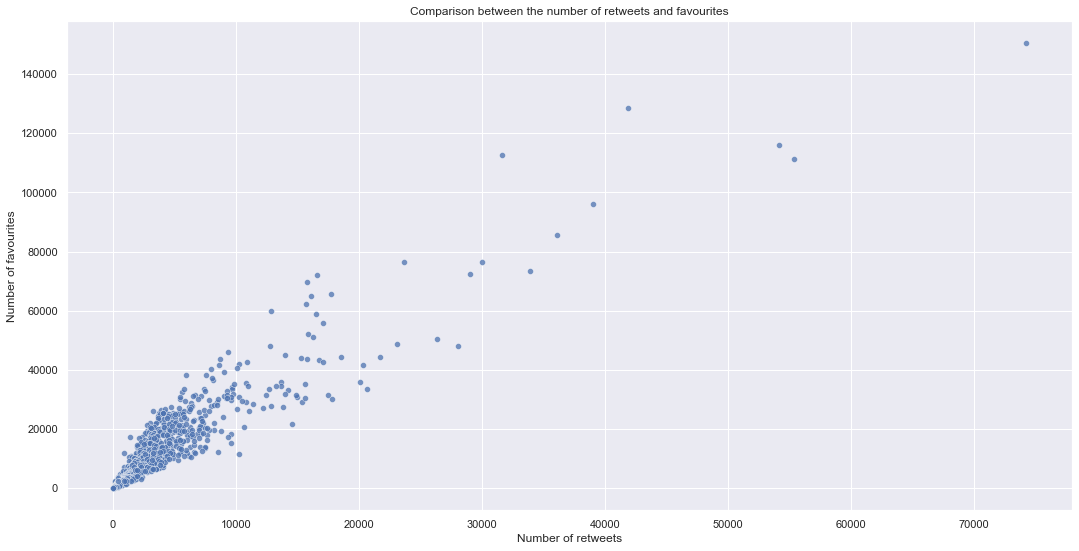

In [154]:
# Only include tweets with retweet and favourites info
tweets_info = twitter_data[twitter_data.retweets.notnull()|twitter_data.favourites.notnull()]

# Define x and y values
x = tweets_info.retweets
y = tweets_info.favourites

plt.figure(figsize=(18,9))

# Plot scattergraph
sns.scatterplot(x,y,alpha=0.75);

# Labels
plt.title('Comparison between the number of retweets and favourites')
plt.xlabel('Number of retweets')
plt.ylabel('Number of favourites');

There appears to be positive correlation between the number of retweets and the number of favourites. As the number of retweets and favourites can vary greatly, it would be more appropriate to plot the log values of these. It would also be interesting to see whether the rating affects the number of retweets or favourites.

In [164]:
tweets_info.favourites.describe()

count    2019.000000  
mean     7890.424963  
std      11571.519276 
min      69.000000    
25%      1744.500000  
50%      3569.000000  
75%      9882.000000  
max      150412.000000
Name: favourites, dtype: float64

/Users/vincentkhor/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


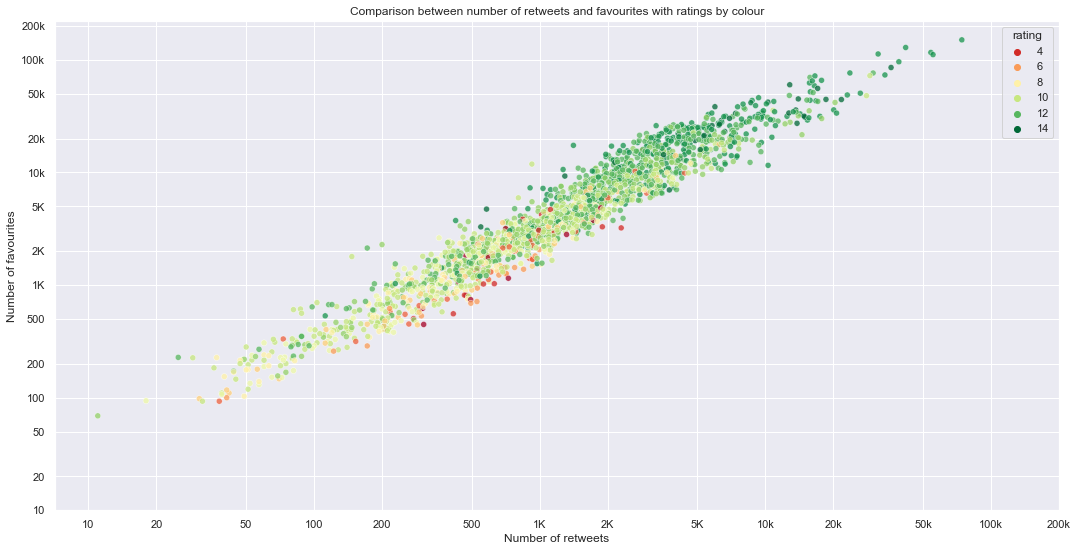

In [176]:
# Define x and y values
x = tweets_info.retweets
y = tweets_info.favourites

plt.figure(figsize=(18,9))

# Plot scattergraph
sns.scatterplot(x,y,hue=tweets_info.rating,palette='RdYlGn',alpha=0.75);
plt.xscale('log')
plt.yscale('log')

# Tick locations
tick_loc = [10,20,50,100,200,500,1e3,2e3,5e3,1e4,2e4,5e4,1e5,2e5]
tick_labels = [10,20,50,100,200,500,'1K', '2K', '5K', '10k', '20k', '50k','100k','200k']

# Labels
plt.xticks(tick_loc,tick_labels)
plt.yticks(tick_loc,tick_labels)
plt.title('Comparison between number of retweets and favourites with ratings by colour')
plt.xlabel('Number of retweets')
plt.ylabel('Number of favourites');

This scattergraph more clearly shows the positive correlation between the number of retweets and favourites. Before, due to the size of some of the numbers, many of the lower datapoints were overlapping. The introduction of colour to display the rating shows that the tweets with higher ratings appear to be correlated with higher retweet and favourite counts. 

### Relationship between the number of favourites and the date of the tweet

/Users/vincentkhor/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


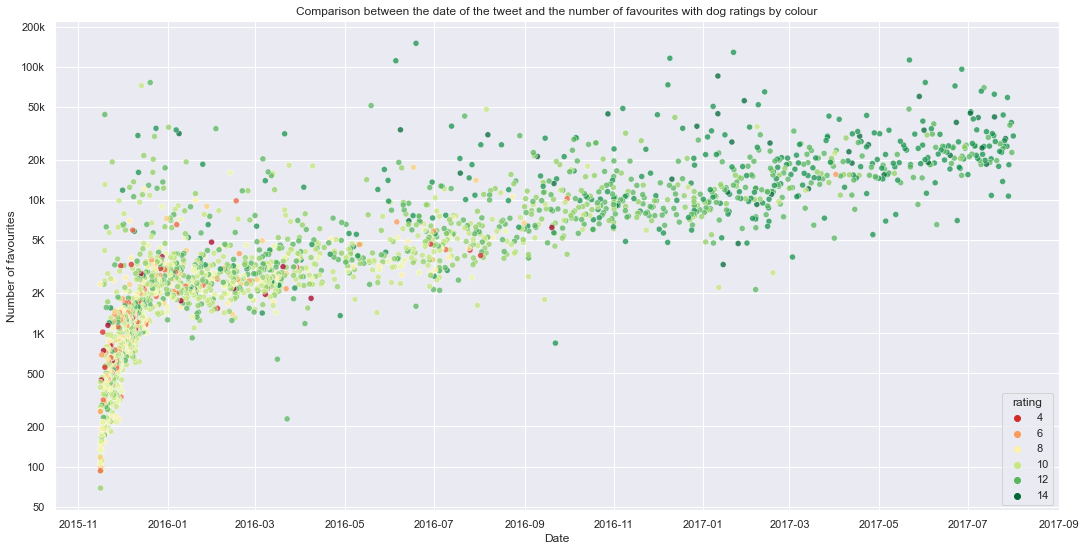

In [179]:
# Define x and y values
x = tweets_info.timestamp
y = tweets_info.favourites

plt.figure(figsize=(18,9))

# Plot scattergraph
sns.scatterplot(x,y,hue=tweets_info.rating,palette='RdYlGn',alpha=0.75);
plt.yscale('log')

# Tick locations
tick_loc = [50,100,200,500,1e3,2e3,5e3,1e4,2e4,5e4,1e5,2e5]
tick_labels = [50,100,200,500,'1K', '2K', '5K', '10k', '20k', '50k','100k','200k']

# Labels
plt.yticks(tick_loc,tick_labels)
plt.title('Comparison between the date of the tweet and the number of favourites with dog ratings by colour')
plt.xlabel('Date')
plt.ylabel('Number of favourites');

This graph shows that the number of favourites has increased overtime. It also shows that overtime, higher ratings are now more common.

### Summary of insights <a id="summary"></a>

- The most common dog rating was 13. Most ratings were at least 10. 1635 out of 2026 tweets have a rating of at least 10. 80.7% of tweets have a rating of at least 10.
- There are a total of four different sources for the tweets made by WeRateDogs. The most common tweet source was iPhone then Vine then Twitter Web Client then TweetDeck.
- The most common dog stage was pupper. There were a few entries that included multiple dog stages, each of which included the dog stage doggo.
- Golden retrievers were the most common dog breed identified by image prediction. 
- A total of 113 dog breeds were identified with the neural network.
- Puppos have on average the highest ratings for any single dog stage group. Whilst puppers had the least.
- There is a strong positive correlation between the number of retweets and the number of favourites. These tweets also tend to have higher dog ratings.
- The number of favourites has increased significantly over time. The average dog ratings have also increased over time.